# IMDB  
Классификация отзывов к фильмам, присвоение рейтинга фильму  

Датасет - https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

### 1. подключение библиотек

In [40]:
import os 
import pathlib 
import numpy as np
from glob import glob
from utils.utils import create_balanced_and_test_datasets
import pickle
import shutil


### 2. Пути к файлам

In [41]:
# Текущее положение
path_1 = os.getcwd()
path_1

'/home/maksim/develops/python/projects/ML/NLP/imdb'

In [42]:
# Расположение файла для кодировки слов
path_vocab = 'imdb.vocab'

In [43]:
!ls

data		    imdb.vocab	     models	utils
dataset3.ipynb	    main.ipynb	     README.md	отчёт_отзывы_к_фильмам.pdf
film_predict.ipynb  model_NET.ipynb  Site


In [44]:
import os

c1 = os.path.join(path_1, 'data/dataset_new/1/')
c2 = os.path.join(path_1, 'data/dataset_new/2/')
c3 = os.path.join(path_1, 'data/dataset_new/3/')
c4 = os.path.join(path_1, 'data/dataset_new/4/')

c7 = os.path.join(path_1, 'data/dataset_new/7/')
c8 = os.path.join(path_1, 'data/dataset_new/8/')
c9 = os.path.join(path_1, 'data/dataset_new/9/')
c10 = os.path.join(path_1, 'data/dataset_new/10/')

folders = [c10, c1, c2, c3, c4, c7, c8, c9]

for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f'Папка создана или уже существует: {folder}')


Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/10/
Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/1/
Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/2/
Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/3/
Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/4/
Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/7/
Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/8/
Папка создана или уже существует: /home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_new/9/


In [45]:
# пути к исходному датасету
path_neg_1 = os.path.join(path_1, 'data/dataset_old/neg_1/')
path_pos_1 = os.path.join(path_1, 'data/dataset_old/pos_1/')

path_neg_2 = os.path.join(path_1, 'data/dataset_old/neg_2/')
path_pos_2 = os.path.join(path_1, 'data/dataset_old/pos_2/')

In [46]:
path_neg_1

'/home/maksim/develops/python/projects/ML/NLP/imdb/data/dataset_old/neg_1/'

In [47]:
neg2 = np.array((glob(os.path.join(path_neg_2, '*'))))

pos2 = np.array((glob(os.path.join(path_pos_2, '*'))))

neg1 = np.array((glob(os.path.join(path_neg_1, '*'))))

pos1 = np.array((glob(os.path.join(path_pos_1, '*'))))

In [48]:
len(pos1)

12500

### 3. вспомогательные функции

In [49]:
from utils.utils import read_file, str_name, inv1, preprocess_text, vocab_read

### 4. Просмотрим пример отзыва

In [50]:
#  текст отзыва
f = read_file(neg2[0])

Why on earth is Colin Firth in this pointless film? Has he really been that strapped for cash?<br /><br />The film isn't clear on what it wants to be about, grief?, exotic places?, ghosts?, a vehicle for Mr Darcy? It's a muddled, muddy mess.<br /><br />There seems to be some sort of idea that Italy must be good, in itself, and that Italian has something to offer as a language - but in the end the girls just want to go back to yankland.<br /><br />There are pointless episodes on the beach, in churches, on busy roads - but what it is all about, or why anybody should care simply isn't clear.<br /><br />There was also a yank woman in the film. It wasn't clear what here job was, but she seemed only to be there to make vapid, inappropriate and maudlin comments to the girl. Was it supposed to be about paedophillia??<br /><br />A pretty dreadful mess, all in all. I gave it 2 rather than 1 because it doesn't have the charm of an utterly ghastly film.


### 5. Пример отзыва токенезированный

In [51]:
from utils.utils import transform_text_1, transform_text_2


# текст отзыва  в виде чисел (токенизация)
result = transform_text_1(neg2[2], path_vocab)
print(' '.join(str(num) for num in result))

11 19 1527 413 57 1499 9 0 834 861 9 0 2529 18 132 24 42 107 179 12 212 6 336 100 146 11 2843 209 12 45 57 1661 6 1104 0 63 7 43 47116 130 25547 5355 2927 2934 18564 83056 0 0 34 639 25 159 309 2600 0 0 4134 20 88 16 4 22178 10118 0 0 100 62 28 252 20 65 0 712 3481 339 18564 3 25 117 435 8130 0 6427 0 139 6 4 1048 3 529 82 6313 1726 0 0 903 35 423 6 392 16 152 0 0 0 0 6313 7 26268 3 3694 3 444 11273 61 7 2 1907 5 34 18564 7 14 4 391 18 35 364 6 1293 3 18564 498 6 634 14 4 391 14 23 498 6 341 46 159 179 138 14 33978 1089 3 2152 20203 0 18 28 252 2600 258 143 3 475 6 2323 985 6 18564 18 23 64 150 178 6 18 6313 1027 6 544 14 53 150 257 9 1317 6 866 0 0 0 19 7 2 332 907 753 32 292 13880 34 1043 107 1180 1899 8132 9 0 3 0 2 0 18 145 107 106 298 38 2139 1041 6 11 4707 406 5 0 0 54 758 6 133 140 7 21 160 18 10 102 16 11 19 0 55 3328 6 802 46 0 11 19 7 469 3 1201 704 36 364 6 1328 16 173 134 286 14 44 0 62 1396 84 5 2 12959 5 2 0 13880 34 81 1043 2 223 182 6 26 418 11 202 99 200 5 259 140 263 

### 6. разбиение исходного датасета по классам (рейтингу)

In [52]:
# preprocess_text(neg1, folders)
# preprocess_text(neg2, folders)
# preprocess_text(pos1, folders)
# preprocess_text(pos2, folders)

### 7. Токенизация датасета и разделение (отделение сбалансированной части)

In [53]:
# загрузка словаря и просмотр первых 10 слов
vocab = vocab_read(path_vocab)
print(vocab[:10])
n =len(vocab)
print(n)
vocab = vocab[:39998]
print(len(vocab))


# Параметры модели и тренировки
input_size = len(vocab) + 2  # Предполагаемый размер словаря (число уникальных слов)

hidden_size = 128
num_classes = 8  # Два класса: положительный и отрицательный отзыв
num_epochs = 10
batch_size = 32
learning_rate = 0.001

len_text = 280  # длина текста (клоичество слов) используемая для оценки 



['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this']
89527
39998


In [54]:
from utils.utils import create_balanced_and_test_datasets
import pickle

dataset_new = os.path.join(path_1, 'data/dataset_new/')
# Путь к датасету
base_path = dataset_new
len_text = 280

# balanced_data, balanced_labels, test_data, test_labels = create_balanced_and_test_datasets(base_path, vocab, len_text, rand=False)

# # Сохраняем оба датасета по отдельности
# with open('data/balanced_dataset.pkl', 'wb') as f:
#     pickle.dump((balanced_data, balanced_labels), f)

# with open('data/test_dataset.pkl', 'wb') as f:
#     pickle.dump((test_data, test_labels), f)

# print("Сбалансированный датасет сохранён в 'balanced_dataset.pkl'")
# print("Тестовый датасет сохранён в 'test_dataset.pkl'")


In [55]:
import pickle

with open('data/balanced_dataset.pkl', 'rb') as f:
    data_loaded, labels_loaded = pickle.load(f)

for i in range(5):
    print(f"Отзыв #{i+1}:")
    print("Вектор:", data_loaded[i])
    print("Метка (рейтинг):", labels_loaded[i])
    print("-" * 40)


Отзыв #1:
Вектор: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 7, 838, 2, 931, 185, 242, 17, 173, 0, 12, 161, 546, 396, 0, 3, 21, 14, 4, 919, 5, 2, 0, 84, 110, 33, 0, 10, 26, 6, 133, 12, 24524, 3, 10372, 67, 6, 27, 31, 65, 0, 42, 6, 1044, 7457, 0, 0, 7026, 100, 2, 6244, 1331, 0, 110, 28, 5, 2, 0, 77, 12, 161, 215, 11, 17, 9, 2212, 0, 10, 26, 6, 133, 10, 26, 112, 157, 41, 229, 2488, 4, 17, 115, 2, 17, 0, 883, 0, 2, 307, 2647, 423, 0, 3, 57, 28, 1621, 36, 65, 0, 43, 706, 227, 100, 2, 307, 2647, 423, 58, 77, 629, 581, 46, 5, 65, 0, 6, 165, 0, 3, 10, 102, 89, 5, 175, 0, 833, 71, 76, 0, 12, 13, 4, 0, 0, 35, 24, 168, 6, 120, 2, 147, 17, 0, 0, 100, 2, 0, 4362, 46, 0, 3, 71, 22280, 33, 20521, 5, 19499, 6, 112, 939, 71, 69, 0, 71, 404, 12, 8, 13, 2261, 6, 0, 9482, 12, 71, 60, 21, 27, 109, 1163, 2, 0, 10, 26, 109, 49, 180, 79, 101, 9, 56, 0, 0, 26, 12956, 15, 4125, 0, 1

In [56]:
with open('data/test_dataset.pkl', 'rb') as f:
    test_data_loaded, test_labels_loaded = pickle.load(f)

for i in range(5):
    print(f"Отзыв #{i+1}:")
    print("Вектор:", test_data_loaded[i])
    print("Метка (рейтинг):", test_labels_loaded[i])
    print("-" * 40)


Отзыв #1:
Вектор: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 19, 7, 1628, 0, 21, 62, 12, 13990, 62, 3759, 4, 54, 1708, 609, 9548, 5, 0, 8, 7, 25, 11637, 3, 929, 582, 9, 512, 5, 2, 222, 23, 923, 20, 19, 12, 96, 146, 3, 2590, 413, 0, 2, 62, 2416, 5, 2, 17, 7, 2, 2651, 5, 4, 3820, 361, 34, 69, 13242, 16, 0, 32497, 3, 120, 65, 1887, 381, 896, 14, 73, 14, 360, 0, 0, 2800, 5, 2, 11051, 2933, 498, 131, 177, 5554, 0, 25184, 6, 0, 1185, 0, 0, 313, 0, 4279, 9, 0, 18, 25, 1708, 262, 20, 2, 733, 14, 73, 14, 2, 1042, 160, 861, 1201, 1379, 18709, 5, 519, 36, 2, 0, 10034, 11, 17, 14, 4, 2634, 273

#### 7.2 Преобразование всего датасета (не сбалансированный)

In [57]:
from utils.utils import create_dataset_no_split

# all_data, all_labels = create_dataset_no_split(base_path, vocab, len_text, rand=False)

# # Сохраняем оба датасета по отдельности
# with open('data/all_dataset.pkl', 'wb') as f:
#     pickle.dump((all_data, all_labels), f)

# print("Сбалансированный датасет сохранён в 'data/all_dataset.pkl'")


In [58]:
with open('data/all_dataset.pkl', 'rb') as f:
    all_data, all_labels = pickle.load(f)

for i in range(5):
    print(f"Отзыв #{i+1}:")
    print("Вектор:", all_data[i])
    print("Метка (рейтинг):", all_labels[i])
    print("-" * 40)

Отзыв #1:
Вектор: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 144, 611, 177, 14138, 5, 0, 3, 54, 680, 0, 186, 11, 17, 13, 9158, 0, 0, 0, 287, 11, 17, 100, 308, 20, 2, 1097, 12, 968, 0, 13, 9, 8, 0, 6437, 517, 79, 0, 3, 304, 11, 17, 10, 97, 66, 12, 11, 60, 27, 2, 62, 0, 0, 0, 19, 7, 4, 3446, 429, 5, 2, 153, 0, 2, 0, 3, 471, 7, 9158, 5187, 0, 10, 411, 257, 11, 5, 4, 17, 92, 9, 2, 0, 0, 0, 563, 64, 368, 11, 17, 870, 321, 900, 9, 28, 5, 2, 0]
Метка (рейтинг): 0
-----------------------------

### 8. Загрузка и разделение датасета

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from utils.dataset import ReviewDatasetWithAug
# Параметры модели и тренировки
input_size = 40000  # Предполагаемый размер словаря (число уникальных слов)

hidden_size = 128
num_classes = 8  # классы отзывов
num_epochs = 5
batch_size = 64
learning_rate = 0.001
weight_decay=0.01
len_text = 500  # длина текста (клоичество слов) используемая для оценки 


# Определение числа фолдов
k_folds = 5




train_data, val_data, train_labels, val_labels = train_test_split(
    data_loaded, labels_loaded, test_size=0.1, random_state=42, stratify=labels_loaded
)


train_dataset = ReviewDatasetWithAug(train_data, train_labels, augment=True, replace_prob=0.05)
val_dataset = ReviewDatasetWithAug(val_data, val_labels, augment=False)

# Создание DataLoader для батчей
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)




import torch
# датасет сбалансированных классов (обрезанный)
data_tensor = torch.tensor(data_loaded, dtype=torch.long)     # пример: long для индексов слов
labels_tensor = torch.tensor(labels_loaded, dtype=torch.long)



# Весь датасет

all_data_tensor = torch.tensor(all_data, dtype=torch.long)     # пример: long для индексов слов
all_labels_tensor = torch.tensor(all_labels, dtype=torch.long)


# all_dataset = ReviewDatasetWithAug(all_data, all_labels, augment=False, replace_prob=0.05)




### 9. Просмотр примера из датасета

In [60]:


# Получаем один батч (данные и метки)
for batch_data, batch_labels in train_loader:
    print("Данные (текст в числовом виде):")
    print(batch_data)         # тензор размера [batch_size, len_text]
    print("Метки (рейтинги):")
    print(batch_labels)       # тензор размера [batch_size]
    break  # чтобы показать только первый батч


Данные (текст в числовом виде):
tensor([[    0,     1,     5,  ...,     7,     8,     0],
        [ 2647,     5,   159,  ...,   354,    16,     2],
        [   44,    11,    17,  ...,     5,     2,     0],
        ...,
        [    0,  2017,  5746,  ...,     5,  5239,   240],
        [    0,     0,     0,  ..., 16973,    20,     0],
        [ 8202,  3837,     9,  ...,   197,    15,    40]])
Метки (рейтинги):
tensor([6, 5, 1, 0, 4, 7, 6, 3, 5, 2, 2, 7, 6, 3, 5, 1, 0, 0, 0, 5, 4, 6, 7, 7,
        1, 1, 4, 5, 0, 7, 5, 6, 6, 3, 0, 5, 2, 4, 2, 1, 7, 0, 4, 3, 3, 1, 0, 6,
        5, 6, 6, 0, 1, 0, 0, 5, 5, 6, 1, 3, 1, 5, 3, 2])


In [61]:
print("Пример из батча (первый элемент):")
print("Данные:", batch_data[0])
print("Метка:", batch_labels[0])


Пример из батча (первый элемент):
Данные: tensor([    0,     1,     5,     2,  1267,     5,     1,    17,   193,    27,
         1149,    14,     4,  1337,     0,    84,    39,     7,    21,    74,
          208,     9,     0,     0,     0,     0,     0,     0,     8,    15,
           56,  6617,   582,    15,     2,     0,     3,     0,     7,     8,
           15,     2,   811,     5,     2,     0,    41,     7,    39,     1,
           51,     0,    44,     0,     8,     7,    15,   243,     2, 11716,
          398,     0,     0,     0,    19,     0,    57,     0,   557,     0,
            0,    20,     0,    10,    68,   809,    89,     5,     2,    77,
           34,   767,     6,   105,   590,   101,     0,   145,     5, 16639,
        15348, 19593,     0,    10,   156,   344,    80,     0,    24,    28,
            5,     2, 23016,    12,    10,     0,  2211,     1,     2,     0,
            0,     1,    24,  2034,     6,   590,   185,     3,     6,   273,
            1,  1319, 

### 10. Модель

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms


from utils.model import SentimentClassifier

In [63]:
# Инициализация модели
# Параметры модели и тренировки
input_size = 40000  # Предполагаемый размер словаря (число уникальных слов)

hidden_size = 128
num_classes = 8  # классы отзывов
num_epochs = 5
batch_size = 48
learning_rate = 0.001
weight_decay=0.01
len_text = 500  # длина текста (клоичество слов) используемая для оценки 


# Определение числа фолдов
k_folds = 5


print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")
print("работаем на устройстве: ", DEVICE)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)


model.to(device)

True
работаем на устройстве:  cuda
Версия torch:            2.7.1+cu126
версия  cuDNN:           91100


SentimentClassifier(
  (embedding): Embedding(40000, 128)
  (lstm1): LSTM(128, 128, batch_first=True)
  (lstm2): LSTM(128, 128, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=128, out_features=8, bias=True)
)

### 11. Тренировка

Epoch 1/20 | Train Loss: 1.9561 | Train Accuracy: 0.2521 | Val Loss: 1.7425 | Val Accuracy: 0.3298
Сохранена лучшая модель


Epoch 2/20 | Train Loss: 1.6876 | Train Accuracy: 0.3452 | Val Loss: 1.6134 | Val Accuracy: 0.3720
Сохранена лучшая модель


Epoch 3/20 | Train Loss: 1.5192 | Train Accuracy: 0.3960 | Val Loss: 1.5349 | Val Accuracy: 0.3916
Сохранена лучшая модель


Epoch 4/20 | Train Loss: 1.3987 | Train Accuracy: 0.4363 | Val Loss: 1.5194 | Val Accuracy: 0.3988
Сохранена лучшая модель


Epoch 5/20 | Train Loss: 1.2783 | Train Accuracy: 0.4774 | Val Loss: 1.5743 | Val Accuracy: 0.3799


Epoch 6/20 | Train Loss: 1.1423 | Train Accuracy: 0.5334 | Val Loss: 1.6449 | Val Accuracy: 0.3804


Epoch 7/20 | Train Loss: 0.9845 | Train Accuracy: 0.6017 | Val Loss: 1.8306 | Val Accuracy: 0.3627


Epoch 8/20 | Train Loss: 0.8486 | Train Accuracy: 0.6573 | Val Loss: 1.9821 | Val Accuracy: 0.3573


Epoch 9/20 | Train Loss: 0.7171 | Train Accuracy: 0.7166 | Val Loss: 2.0968 | Val Accuracy: 0.3548


Epoch 10/20 | Train Loss: 0.6033 | Train Accuracy: 0.7677 | Val Loss: 2.3208 | Val Accuracy: 0.3618


Epoch 11/20 | Train Loss: 0.5158 | Train Accuracy: 0.8041 | Val Loss: 2.6277 | Val Accuracy: 0.3506


Epoch 12/20 | Train Loss: 0.4460 | Train Accuracy: 0.8346 | Val Loss: 2.6397 | Val Accuracy: 0.3375


Epoch 13/20 | Train Loss: 0.3774 | Train Accuracy: 0.8627 | Val Loss: 2.9590 | Val Accuracy: 0.3429


Epoch 14/20 | Train Loss: 0.3368 | Train Accuracy: 0.8790 | Val Loss: 3.0219 | Val Accuracy: 0.3545


Epoch 15/20 | Train Loss: 0.2948 | Train Accuracy: 0.8951 | Val Loss: 3.1048 | Val Accuracy: 0.3611


Epoch 16/20 | Train Loss: 0.2637 | Train Accuracy: 0.9065 | Val Loss: 3.2266 | Val Accuracy: 0.3573


Epoch 17/20 | Train Loss: 0.2355 | Train Accuracy: 0.9181 | Val Loss: 3.3314 | Val Accuracy: 0.3618


Epoch 18/20 | Train Loss: 0.2232 | Train Accuracy: 0.9221 | Val Loss: 3.3197 | Val Accuracy: 0.3466


Epoch 19/20 | Train Loss: 0.1993 | Train Accuracy: 0.9323 | Val Loss: 3.4627 | Val Accuracy: 0.3471


Epoch 20/20 | Train Loss: 0.1872 | Train Accuracy: 0.9357 | Val Loss: 3.5388 | Val Accuracy: 0.3445


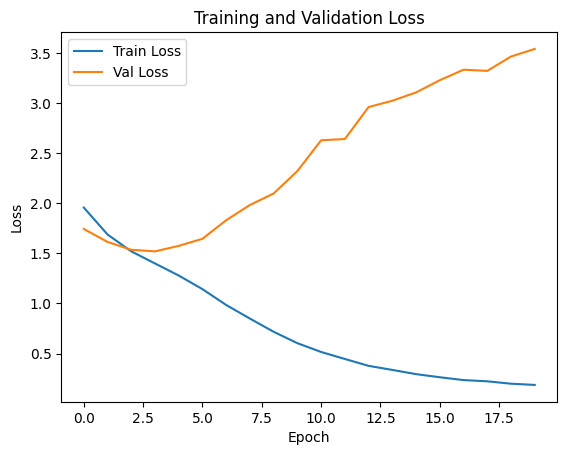

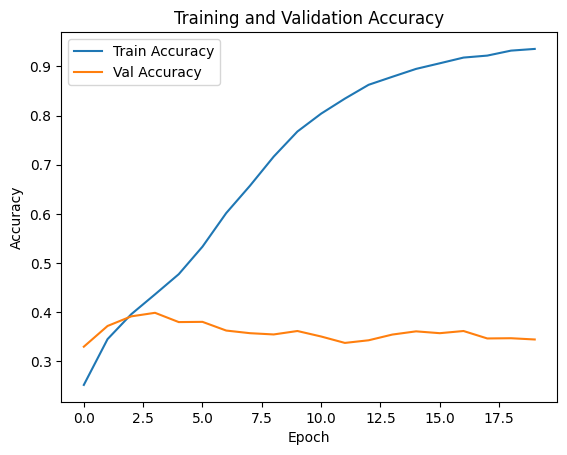

In [83]:
# обучение без тестовой выборки (разделение train val)
from utils.model import train_model
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


train_data, val_data, train_labels, val_labels = train_test_split(
    all_data, all_labels, test_size=0.1, random_state=42, stratify=all_labels
)


train_dataset = ReviewDatasetWithAug(train_data, train_labels, augment=True, replace_prob=0.1)
val_dataset = ReviewDatasetWithAug(val_data, val_labels, augment=False)

# Создание DataLoader для батчей
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)




hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)


model.to(device)


# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)  
#optimizer = optim.SGD(model.parameters(), lr=learning_rate) 
#optimizer = optim.RMSprop(model.parameters(), lr=learning_rate) 
#optimizer = optim.Adagrad(model.parameters(), lr=learning_rate) 


#model.to(device)

# model.load_state_dict(torch.load('models/model_1_1.pth', map_location=device))
model.to(device)
train_model(model, optimizer, criterion, train_loader, val_loader, num_epochs=20, save_model_path = 'models/model_1_1.pth', device=device)


Epoch 1/20 | Train Loss: 0.5335 | Train Accuracy: 0.8186 | Val Loss: 0.4273 | Val Accuracy: 0.8702
Сохранена лучшая модель


Epoch 2/20 | Train Loss: 0.4387 | Train Accuracy: 0.8500 | Val Loss: 0.4919 | Val Accuracy: 0.8456


Epoch 3/20 | Train Loss: 0.3710 | Train Accuracy: 0.8732 | Val Loss: 0.6377 | Val Accuracy: 0.8010


Epoch 4/20 | Train Loss: 0.3403 | Train Accuracy: 0.8836 | Val Loss: 0.6018 | Val Accuracy: 0.8204


Epoch 5/20 | Train Loss: 0.2983 | Train Accuracy: 0.8979 | Val Loss: 0.8048 | Val Accuracy: 0.7507


Epoch 6/20 | Train Loss: 0.2832 | Train Accuracy: 0.9010 | Val Loss: 0.6835 | Val Accuracy: 0.7978


Epoch 7/20 | Train Loss: 0.2545 | Train Accuracy: 0.9145 | Val Loss: 0.8161 | Val Accuracy: 0.7678


Epoch 8/20 | Train Loss: 0.2467 | Train Accuracy: 0.9158 | Val Loss: 0.8444 | Val Accuracy: 0.7655


Epoch 9/20 | Train Loss: 0.2319 | Train Accuracy: 0.9198 | Val Loss: 1.1895 | Val Accuracy: 0.6774


Epoch 10/20 | Train Loss: 0.2259 | Train Accuracy: 0.9226 | Val Loss: 1.1188 | Val Accuracy: 0.6934


Epoch 11/20 | Train Loss: 0.2084 | Train Accuracy: 0.9288 | Val Loss: 1.1882 | Val Accuracy: 0.6904


Epoch 12/20 | Train Loss: 0.2055 | Train Accuracy: 0.9302 | Val Loss: 1.0134 | Val Accuracy: 0.7308


Epoch 13/20 | Train Loss: 0.1912 | Train Accuracy: 0.9350 | Val Loss: 1.1931 | Val Accuracy: 0.6897


Epoch 14/20 | Train Loss: 0.1858 | Train Accuracy: 0.9372 | Val Loss: 1.1864 | Val Accuracy: 0.6913


Epoch 15/20 | Train Loss: 0.1831 | Train Accuracy: 0.9380 | Val Loss: 1.0823 | Val Accuracy: 0.7153


Epoch 16/20 | Train Loss: 0.1735 | Train Accuracy: 0.9406 | Val Loss: 1.2395 | Val Accuracy: 0.6866


Epoch 17/20 | Train Loss: 0.1701 | Train Accuracy: 0.9410 | Val Loss: 1.2335 | Val Accuracy: 0.6829


Epoch 18/20 | Train Loss: 0.1689 | Train Accuracy: 0.9424 | Val Loss: 1.2609 | Val Accuracy: 0.6811


Epoch 19/20 | Train Loss: 0.1594 | Train Accuracy: 0.9463 | Val Loss: 1.3637 | Val Accuracy: 0.6696


Epoch 20/20 | Train Loss: 0.1516 | Train Accuracy: 0.9473 | Val Loss: 1.7605 | Val Accuracy: 0.5963


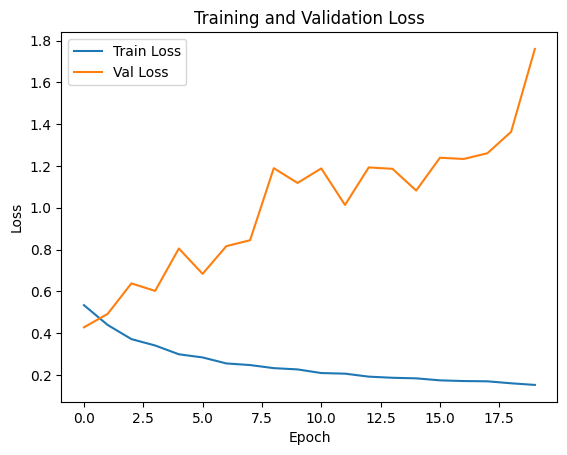

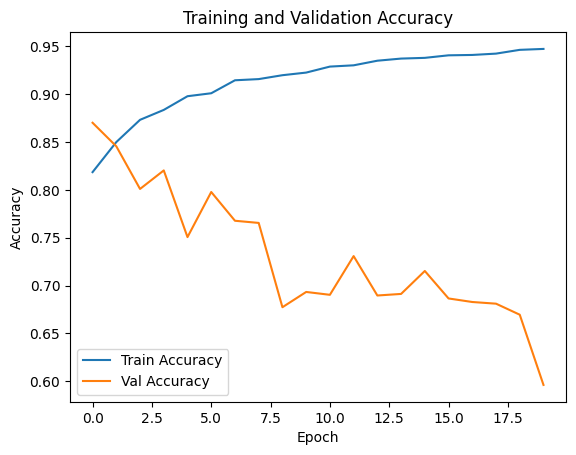

In [84]:
# Обучение на всей выборке валидация на тесте
from utils.model import train_model
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


train_dataset = ReviewDatasetWithAug(data_loaded, labels_loaded, augment=True, replace_prob=0.1)
val_dataset = ReviewDatasetWithAug(test_data_loaded, test_labels_loaded, augment=False)

# Создание DataLoader для батчей
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)




hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)


model.to(device)


# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)  
#optimizer = optim.SGD(model.parameters(), lr=learning_rate) 
#optimizer = optim.RMSprop(model.parameters(), lr=learning_rate) 
#optimizer = optim.Adagrad(model.parameters(), lr=learning_rate) 


#model.to(device)

model.load_state_dict(torch.load('models/model_1_2.pth', map_location=device))
model.to(device)
train_model(model, optimizer, criterion, train_loader, val_loader, num_epochs=20, save_model_path = 'models/model_1_2.pth', device=device)

### 12. Тренировка с кросвалидацией

In [85]:
print(type(data_loaded))          # <class 'list'>
print(type(labels_loaded))        # <class 'list'>

print(len(data_loaded))           # количество примеров
print(len(labels_loaded))         # количество меток

print(data_loaded[0])             # первый текст в виде списка индексов
print(labels_loaded[0])           # метка первого примера


<class 'list'>
<class 'list'>
33208
33208
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 7, 838, 2, 931, 185, 242, 17, 173, 0, 12, 161, 546, 396, 0, 3, 21, 14, 4, 919, 5, 2, 0, 84, 110, 33, 0, 10, 26, 6, 133, 12, 24524, 3, 10372, 67, 6, 27, 31, 65, 0, 42, 6, 1044, 7457, 0, 0, 7026, 100, 2, 6244, 1331, 0, 110, 28, 5, 2, 0, 77, 12, 161, 215, 11, 17, 9, 2212, 0, 10, 26, 6, 133, 10, 26, 112, 157, 41, 229, 2488, 4, 17, 115, 2, 17, 0, 883, 0, 2, 307, 2647, 423, 0, 3, 57, 28, 1621, 36, 65, 0, 43, 706, 227, 100, 2, 307, 2647, 423, 58, 77, 629, 581, 46, 5, 65, 0, 6, 165, 0, 3, 10, 102, 89, 5, 175, 0, 833, 71, 76, 0, 12, 13, 4, 0, 0, 35, 24, 168, 6, 120, 2, 147, 17, 0, 0, 100, 2, 0, 4362, 46, 0, 3, 71, 22280, 33, 20521, 5, 19499, 6, 112, 939, 71, 69, 0, 71, 404, 12, 8, 13, 2261, 6, 0, 9482, 12, 71, 60, 21, 27, 109, 1163, 2, 0, 10, 26, 109, 49, 180, 79, 101, 9, 56, 0, 0, 2

In [86]:
import torch

data_tensor = torch.tensor(data_loaded, dtype=torch.long)     # пример: long для индексов слов
labels_tensor = torch.tensor(labels_loaded, dtype=torch.long)


# Весь датасет
all_data_tensor = torch.tensor(all_data, dtype=torch.long)     # пример: long для индексов слов
all_labels_tensor = torch.tensor(all_labels, dtype=torch.long)

In [88]:
# Обучение с кросвалидацией без тестовой выборки
from utils.model import train_model_cross

hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)



# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=learning_rate) 


model.load_state_dict(torch.load('models/model_3.pth', map_location=device))
model.to(device)

train_model_cross(model, optimizer, criterion, all_data_tensor, all_labels_tensor, k_folds = 7, num_epochs=5, save_model_path = 'models/model_1_3.pth', batch_size=48, device=device)
    

Fold 1 | Epoch 1/5 | Train Loss: 0.4476 | Train Accuracy: 0.8699 | Val Loss: 0.7806 | Val Accuracy: 0.7820
Модель сохранена


Fold 1 | Epoch 2/5 | Train Loss: 0.2023 | Train Accuracy: 0.9363 | Val Loss: 0.9516 | Val Accuracy: 0.7496


Fold 1 | Epoch 3/5 | Train Loss: 0.1526 | Train Accuracy: 0.9500 | Val Loss: 0.7972 | Val Accuracy: 0.8050
Модель сохранена


Fold 1 | Epoch 4/5 | Train Loss: 0.1364 | Train Accuracy: 0.9546 | Val Loss: 1.4494 | Val Accuracy: 0.6703


Fold 1 | Epoch 5/5 | Train Loss: 0.1246 | Train Accuracy: 0.9587 | Val Loss: 1.1989 | Val Accuracy: 0.7192


Fold 2 | Epoch 1/5 | Train Loss: 0.1880 | Train Accuracy: 0.9383 | Val Loss: 0.3819 | Val Accuracy: 0.8601
Модель сохранена


Fold 2 | Epoch 2/5 | Train Loss: 0.1187 | Train Accuracy: 0.9606 | Val Loss: 0.5673 | Val Accuracy: 0.8061


Fold 2 | Epoch 3/5 | Train Loss: 0.1029 | Train Accuracy: 0.9666 | Val Loss: 0.6852 | Val Accuracy: 0.7598


Fold 2 | Epoch 4/5 | Train Loss: 0.0938 | Train Accuracy: 0.9683 | Val Loss: 1.0022 | Val Accuracy: 0.6871


Fold 2 | Epoch 5/5 | Train Loss: 0.0888 | Train Accuracy: 0.9697 | Val Loss: 1.0415 | Val Accuracy: 0.6988


Fold 3 | Epoch 1/5 | Train Loss: 0.1325 | Train Accuracy: 0.9551 | Val Loss: 1.0436 | Val Accuracy: 0.6525


Fold 3 | Epoch 2/5 | Train Loss: 0.0819 | Train Accuracy: 0.9720 | Val Loss: 1.4654 | Val Accuracy: 0.5772


Fold 3 | Epoch 3/5 | Train Loss: 0.0663 | Train Accuracy: 0.9770 | Val Loss: 1.4659 | Val Accuracy: 0.5774


Fold 3 | Epoch 4/5 | Train Loss: 0.0669 | Train Accuracy: 0.9784 | Val Loss: 2.4386 | Val Accuracy: 0.4186


Fold 3 | Epoch 5/5 | Train Loss: 0.0626 | Train Accuracy: 0.9790 | Val Loss: 2.9984 | Val Accuracy: 0.3737


Fold 4 | Epoch 1/5 | Train Loss: 0.1507 | Train Accuracy: 0.9486 | Val Loss: 0.1093 | Val Accuracy: 0.9656
Модель сохранена


Fold 4 | Epoch 2/5 | Train Loss: 0.0863 | Train Accuracy: 0.9720 | Val Loss: 0.0972 | Val Accuracy: 0.9679
Модель сохранена


Fold 4 | Epoch 3/5 | Train Loss: 0.0735 | Train Accuracy: 0.9755 | Val Loss: 0.1444 | Val Accuracy: 0.9514


Fold 4 | Epoch 4/5 | Train Loss: 0.0634 | Train Accuracy: 0.9783 | Val Loss: 0.1624 | Val Accuracy: 0.9463


Fold 4 | Epoch 5/5 | Train Loss: 0.0599 | Train Accuracy: 0.9798 | Val Loss: 0.2481 | Val Accuracy: 0.9191


Fold 5 | Epoch 1/5 | Train Loss: 0.1055 | Train Accuracy: 0.9647 | Val Loss: 0.0308 | Val Accuracy: 0.9918
Модель сохранена


Fold 5 | Epoch 2/5 | Train Loss: 0.0658 | Train Accuracy: 0.9779 | Val Loss: 0.0551 | Val Accuracy: 0.9816


Fold 5 | Epoch 3/5 | Train Loss: 0.0584 | Train Accuracy: 0.9804 | Val Loss: 0.0589 | Val Accuracy: 0.9819


Fold 5 | Epoch 4/5 | Train Loss: 0.0537 | Train Accuracy: 0.9819 | Val Loss: 0.1654 | Val Accuracy: 0.9496


Fold 5 | Epoch 5/5 | Train Loss: 0.0581 | Train Accuracy: 0.9797 | Val Loss: 0.1386 | Val Accuracy: 0.9547


Fold 6 | Epoch 1/5 | Train Loss: 0.0787 | Train Accuracy: 0.9736 | Val Loss: 0.0848 | Val Accuracy: 0.9720


Fold 6 | Epoch 2/5 | Train Loss: 0.0484 | Train Accuracy: 0.9846 | Val Loss: 0.0761 | Val Accuracy: 0.9760


Fold 6 | Epoch 3/5 | Train Loss: 0.0466 | Train Accuracy: 0.9846 | Val Loss: 0.1650 | Val Accuracy: 0.9463


Fold 6 | Epoch 4/5 | Train Loss: 0.0529 | Train Accuracy: 0.9829 | Val Loss: 0.2101 | Val Accuracy: 0.9312


Fold 6 | Epoch 5/5 | Train Loss: 0.0565 | Train Accuracy: 0.9812 | Val Loss: 0.2523 | Val Accuracy: 0.9157


Fold 7 | Epoch 1/5 | Train Loss: 0.0790 | Train Accuracy: 0.9730 | Val Loss: 0.8110 | Val Accuracy: 0.7456


Fold 7 | Epoch 2/5 | Train Loss: 0.0494 | Train Accuracy: 0.9834 | Val Loss: 1.0315 | Val Accuracy: 0.7144


Fold 7 | Epoch 3/5 | Train Loss: 0.0447 | Train Accuracy: 0.9856 | Val Loss: 1.2019 | Val Accuracy: 0.6605


Fold 7 | Epoch 4/5 | Train Loss: 0.0389 | Train Accuracy: 0.9871 | Val Loss: 1.3055 | Val Accuracy: 0.6272


Fold 7 | Epoch 5/5 | Train Loss: 0.0489 | Train Accuracy: 0.9839 | Val Loss: 1.5414 | Val Accuracy: 0.5889


### 13. Тестирование

In [89]:
print('Проверка на train и val')
train_data, val_data, train_labels, val_labels = train_test_split(
    data_loaded, labels_loaded, test_size=0.1, random_state=42, stratify=labels_loaded
)


train_dataset = ReviewDatasetWithAug(train_data, train_labels, augment=True, replace_prob=0.05)
val_dataset = ReviewDatasetWithAug(val_data, val_labels, augment=False)

# Создание DataLoader для батчей
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)


from utils.model import evaluation_model

print("Обучение - train val:")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_1_1.pth'))
model.to(device)

print('train - ', evaluation_model(model, train_loader, device=device))

print('val - ', evaluation_model(model, val_loader, device=device))


print("Обучение - Вся выборка :")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_1_2.pth'))
model.to(device)

print('train - ', evaluation_model(model, train_loader, device=device))

print('val - ', evaluation_model(model, val_loader, device=device))


print("Обучение - кросвалидация:")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_1_3.pth'))
model.to(device)
print('train - ', evaluation_model(model, train_loader, device=device))

print('val - ', evaluation_model(model, val_loader, device=device))



print("Обучение - раньше:")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_3.pth'))
model.to(device)

print('train - ', evaluation_model(model, train_loader, device=device))

print('test - ', evaluation_model(model, val_loader, device=device))

Проверка на train и val
Обучение - train val:
train -   точность: 0.4066
val -   точность: 0.4161
Обучение - Вся выборка :
train -   точность: 0.9419
val -   точность: 0.9813
Обучение - кросвалидация:
train -   точность: 0.9499
val -   точность: 0.9871
Обучение - раньше:
train -   точность: 0.8001
test -   точность: 0.8512


In [90]:
print('Проверка на всей выборке  и test')
train_dataset = ReviewDatasetWithAug(data_loaded, labels_loaded, augment=True, replace_prob=0.1)
val_dataset = ReviewDatasetWithAug(test_data_loaded, test_labels_loaded, augment=False)

# Создание DataLoader для батчей
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)



from utils.model import evaluation_model

print("Обучение - train val:")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_1_1.pth'))
model.to(device)

print('all - ', evaluation_model(model, train_loader, device=device))

print('test - ', evaluation_model(model, val_loader, device=device))


print("Обучение - Вся выборка :")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_1_2.pth'))
model.to(device)

print('all - ', evaluation_model(model, train_loader, device=device))

print('test - ', evaluation_model(model, val_loader, device=device))


print("Обучение - кросвалидация:")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_1_3.pth'))
model.to(device)
print('all - ', evaluation_model(model, train_loader, device=device))

print('test - ', evaluation_model(model, val_loader, device=device))



print("Обучение - раньше:")
hidden_size = 256

model = SentimentClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load('models/model_3.pth'))
model.to(device)

print('all - ', evaluation_model(model, train_loader, device=device))

print('test - ', evaluation_model(model, val_loader, device=device))

Проверка на всей выборке  и test
Обучение - train val:
all -   точность: 0.3944
test -   точность: 0.7259
Обучение - Вся выборка :
all -   точность: 0.9017
test -   точность: 0.8702
Обучение - кросвалидация:
all -   точность: 0.8979
test -   точность: 0.9957
Обучение - раньше:
all -   точность: 0.7529
test -   точность: 0.8143


### 14. Проверка на примере

In [74]:
from utils.utils import transform_text_inferens

# Расположение файла для кодировки слов
path_vocab = 'imdb.vocab'


text_1 = 'Something strange is happening in Loch Ness. The water is crystal clear, nor cold. A giant robotic plastic monster emerges and kills Scots! What is this movie?! First, I love reading stories about Nessie, sea monsters in general. When i saw this for sale, i thought it was a cheap rip off of jaws. No. It was terrible! The story was pointless, acting was 100% garbage, the only up side was the cool mechanical Nessie they used. It was full of inaccuracy, wrong locations, and bad everything. Not worth your while, just leave it on the shelf (or garbage can) you found it on. On second note, This film was shot in Cailifornia, not Loch Ness, a major diss to Nessie fans.'


text_10 = 'Those two main characters Erkan and Stefan are a munich comedy act. I was wondering if this is one of these typical slapstick movies where the story is either not important or simply not existing. But when I saw this movie I was very happy that there is a cool story and the main characters really fit in it.<br /><br />All in all very amusing and not a common german movie.'



text2 = transform_text_inferens(text_10, path_vocab)
text2

tensor([    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [75]:
from utils.model import SentimentClassifierInferens
import torch

input_size = 40000 
hidden_size = 256
num_classes = 8

model = SentimentClassifierInferens(input_size, hidden_size, num_classes).to('cpu')
model.load_state_dict(torch.load('models/model_3.pth'))


model.eval()

output = model(text2)
output

tensor([ -2.1243,  -2.0518, -10.2354,   1.1777,  -1.7614,   2.4131,  -1.4634,
          8.4985], grad_fn=<ViewBackward0>)

In [76]:
input_size = 40000 
hidden_size = 256
num_classes = 8

model = SentimentClassifierInferens(input_size, hidden_size, num_classes).to('cpu')
model.load_state_dict(torch.load('models/model_1_2.pth'))


model.eval()

output = model(text2)
output

tensor([-2.5472, -1.9794, -5.0070,  1.6003, -0.7674,  1.0865, -0.3572,  3.2438],
       grad_fn=<ViewBackward0>)

In [77]:
input_size = 40000 
hidden_size = 256
num_classes = 8

model = SentimentClassifierInferens(input_size, hidden_size, num_classes).to('cpu')
model.load_state_dict(torch.load('models/model_1_3.pth'))


model.eval()


output = model(text2)
output

tensor([-0.7031, -3.7945, -7.4701, -1.0620, -1.9110, -0.0928,  0.4833,  6.0452],
       grad_fn=<ViewBackward0>)